# Experiment 3 – Decision Tree & Random Forest for Classification

**Objective:** Apply Decision Tree and Random Forest classifiers on the **Heart Disease** dataset and compare their performance.

**Dataset:** `heart.csv` — 1025 samples, 13 features, 1 binary target  
- **target = 1** → patient has heart disease  
- **target = 0** → patient does not have heart disease

## Step 1 — Import Libraries

In [1]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn: preprocessing, models, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)

# Make plots look clean
sns.set_style("whitegrid")
print("All libraries imported successfully ✅")

All libraries imported successfully ✅


## Step 2 — Load and Explore the Dataset

In [2]:
# Load the CSV file into a DataFrame
df = pd.read_csv("heart.csv")

# Display the first 5 rows to get an overview
print(f"Dataset shape: {df.shape[0]} rows × {df.shape[1]} columns\n")
df.head()

Dataset shape: 1025 rows × 14 columns



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
# Check data types and look for missing values
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
# Summary statistics for every column
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# Check if there are any missing values in the dataset
print("Missing values per column:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Total missing values: 0


In [6]:
# Check if duplicate rows exist and drop them
print(f"Duplicate rows: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Shape after removing duplicates: {df.shape}")

Duplicate rows: 723
Shape after removing duplicates: (302, 14)


## Step 3 — Visualise the Data

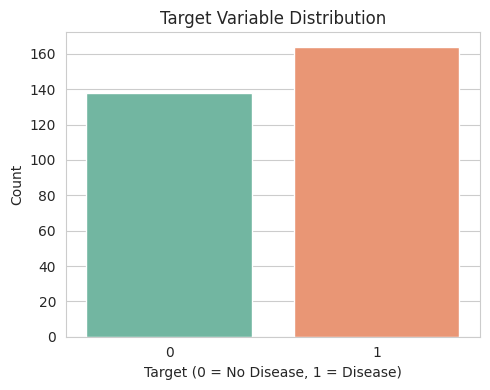

In [7]:
# Distribution of the target variable (0 = No disease, 1 = Disease)
plt.figure(figsize=(5, 4))
sns.countplot(x="target", data=df, hue="target", palette="Set2", legend=False)
plt.title("Target Variable Distribution")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

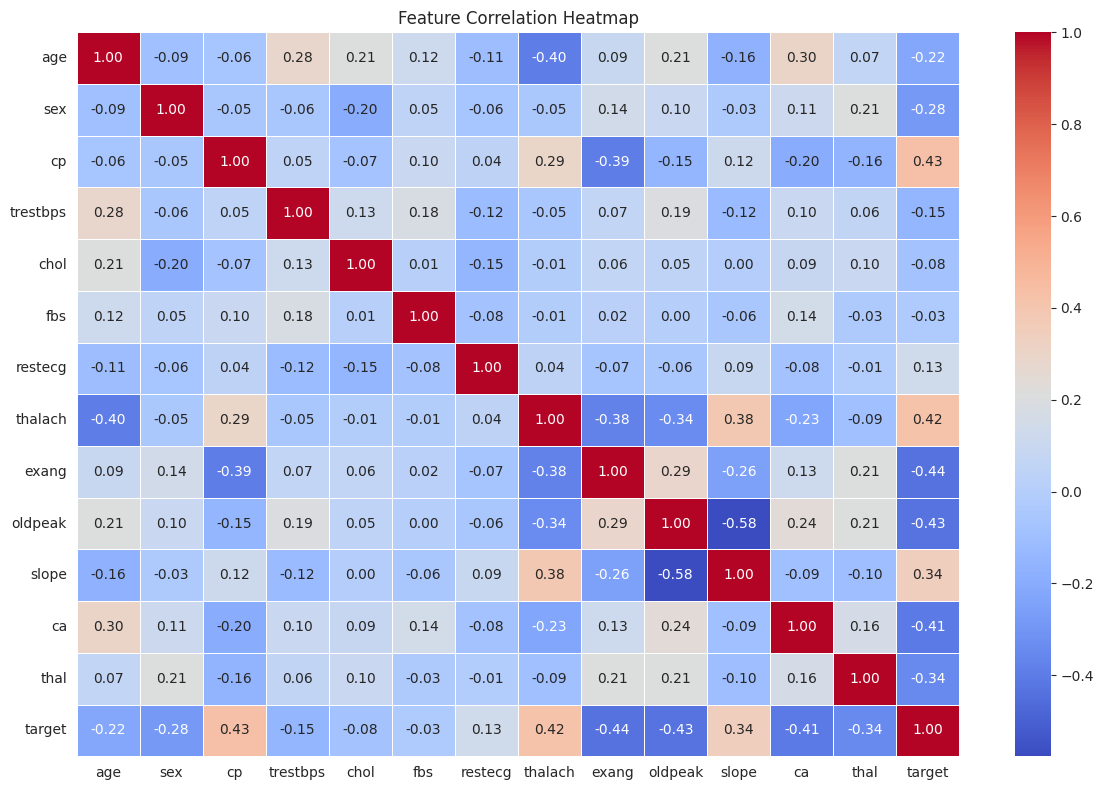

In [8]:
# Correlation heatmap — helps us see which features relate to the target
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

## Step 4 — Prepare Features (X) and Target (y)

We separate the independent features from the target column and then split into training (80 %) and testing (20 %) sets.

In [9]:
# X = all columns except 'target'  |  y = 'target' column
X = df.drop("target", axis=1)
y = df["target"]

print(f"Features shape : {X.shape}")
print(f"Target shape   : {y.shape}")
print(f"Target classes  : {y.unique()}")

Features shape : (302, 13)
Target shape   : (302,)
Target classes  : [0 1]


In [10]:
# Split into training (80%) and testing (20%) sets
# random_state ensures reproducibility — same split every time
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training samples : {X_train.shape[0]}")
print(f"Testing samples  : {X_test.shape[0]}")

Training samples : 241
Testing samples  : 61


In [11]:
# Feature scaling — brings all features to the same scale
# Tree models don't strictly need this, but it's good practice
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # fit on train, transform train
X_test = scaler.transform(X_test)         # only transform test (no fitting!)

print("Feature scaling done ✅")

Feature scaling done ✅


## Step 5 — Train a Decision Tree Classifier

A **Decision Tree** splits data based on feature thresholds to create a tree of decisions.  
- Easy to interpret and visualise.  
- Prone to overfitting if not pruned.

In [12]:
# Create and train the Decision Tree model
# max_depth=5 limits tree depth to prevent overfitting
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree trained ✅")

Decision Tree trained ✅


In [13]:
# Evaluate Decision Tree performance
print("=" * 50)
print("   DECISION TREE — Classification Report")
print("=" * 50)
print(classification_report(y_test, y_pred_dt, target_names=["No Disease", "Disease"]))

   DECISION TREE — Classification Report
              precision    recall  f1-score   support

  No Disease       0.74      0.78      0.76        32
     Disease       0.74      0.69      0.71        29

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



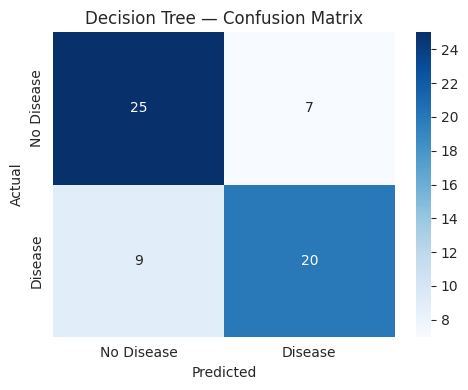

In [14]:
# Confusion Matrix for Decision Tree
plt.figure(figsize=(5, 4))
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Disease", "Disease"],
            yticklabels=["No Disease", "Disease"])
plt.title("Decision Tree — Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

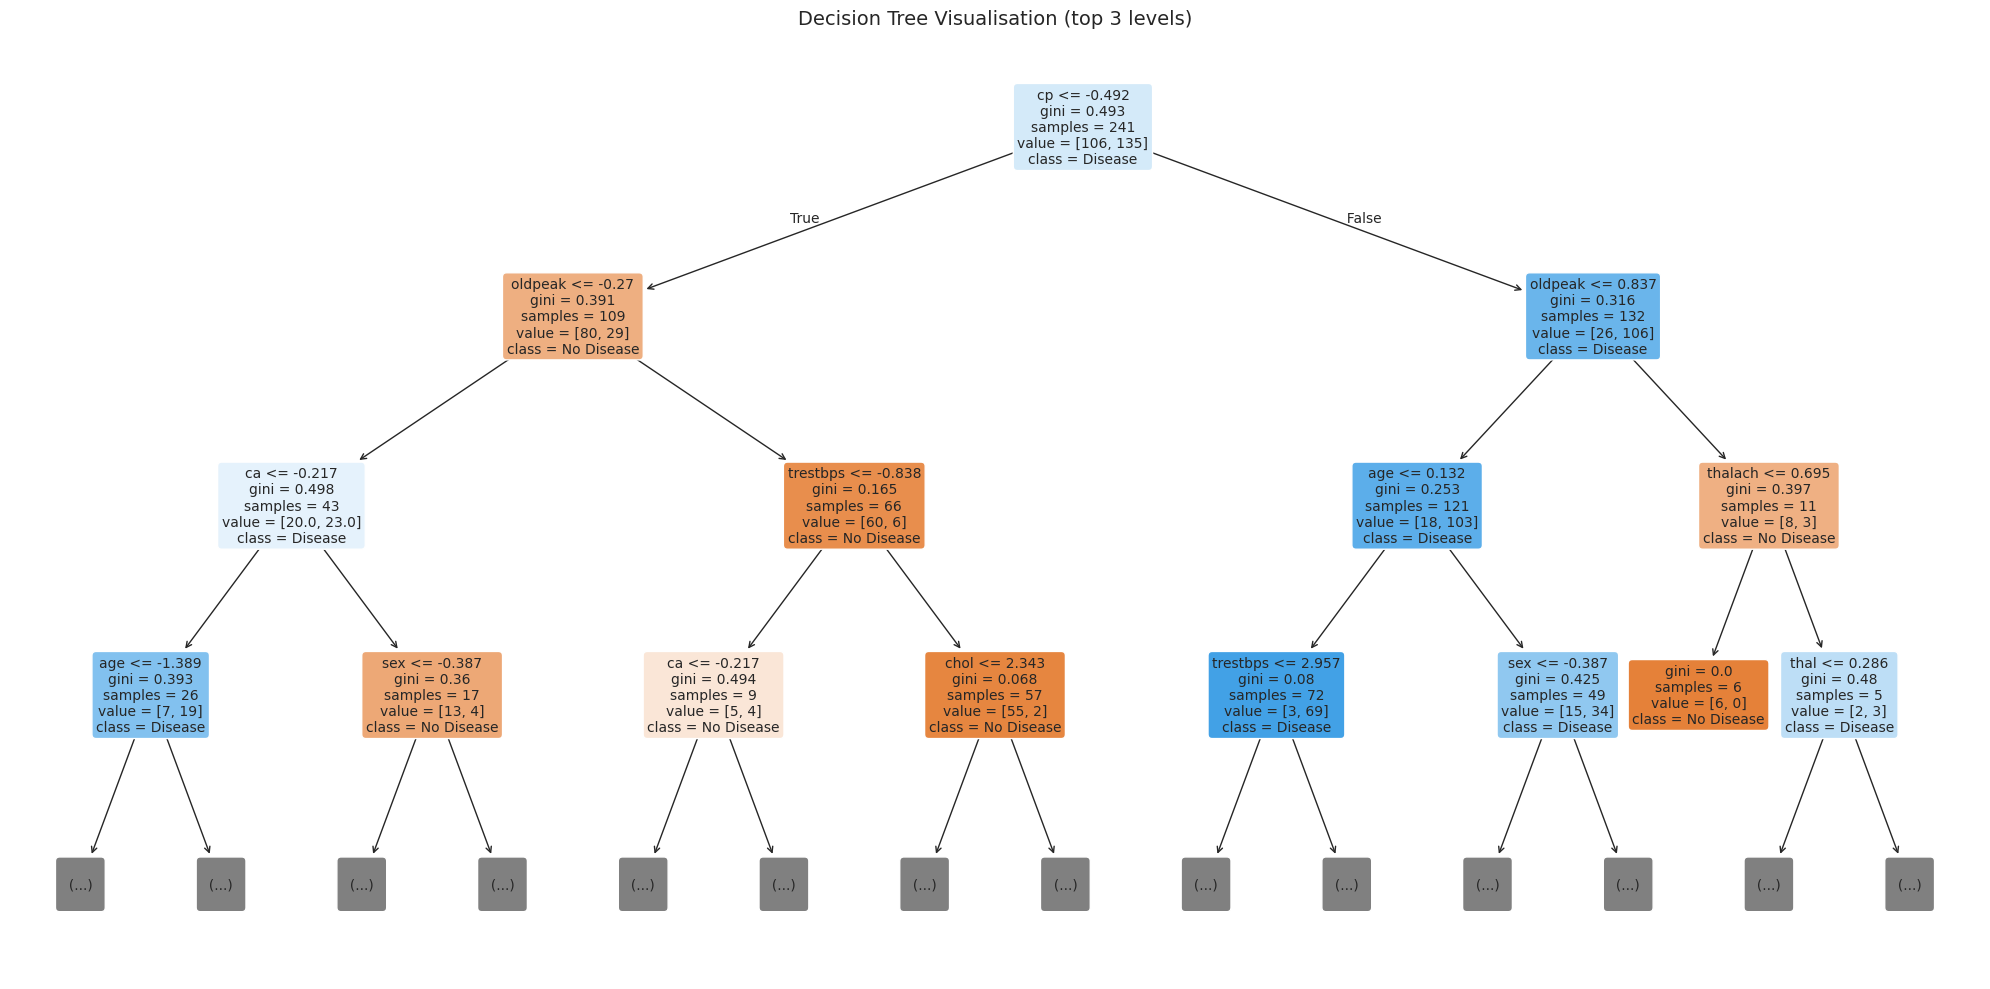

In [15]:
# Visualise the Decision Tree (limited depth for readability)
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=df.columns[:-1],   # all columns except 'target'
    class_names=["No Disease", "Disease"],
    filled=True,                      # colour nodes by class
    rounded=True,
    fontsize=10,
    max_depth=3                       # show only top 3 levels
)
plt.title("Decision Tree Visualisation (top 3 levels)", fontsize=14)
plt.tight_layout()
plt.show()

## Step 6 — Train a Random Forest Classifier

A **Random Forest** builds many decision trees on random subsets of data and features, then takes a majority vote.  
- More accurate than a single tree (reduces overfitting via bagging).  
- `n_estimators` = number of trees in the forest.

In [16]:
# Create and train the Random Forest model
# n_estimators=100 → build 100 decision trees
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

print("Random Forest trained ✅")

Random Forest trained ✅


In [17]:
# Evaluate Random Forest performance
print("=" * 50)
print("   RANDOM FOREST — Classification Report")
print("=" * 50)
print(classification_report(y_test, y_pred_rf, target_names=["No Disease", "Disease"]))

   RANDOM FOREST — Classification Report
              precision    recall  f1-score   support

  No Disease       0.89      0.78      0.83        32
     Disease       0.79      0.90      0.84        29

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



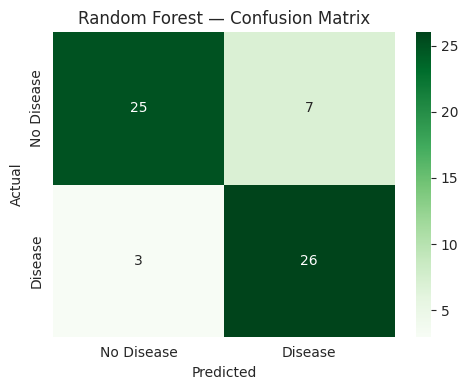

In [18]:
# Confusion Matrix for Random Forest
plt.figure(figsize=(5, 4))
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens",
            xticklabels=["No Disease", "Disease"],
            yticklabels=["No Disease", "Disease"])
plt.title("Random Forest — Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

## Step 7 — Feature Importance (Random Forest)

Random Forest can rank features by how much they contribute to predictions. Higher importance → more useful for classification.

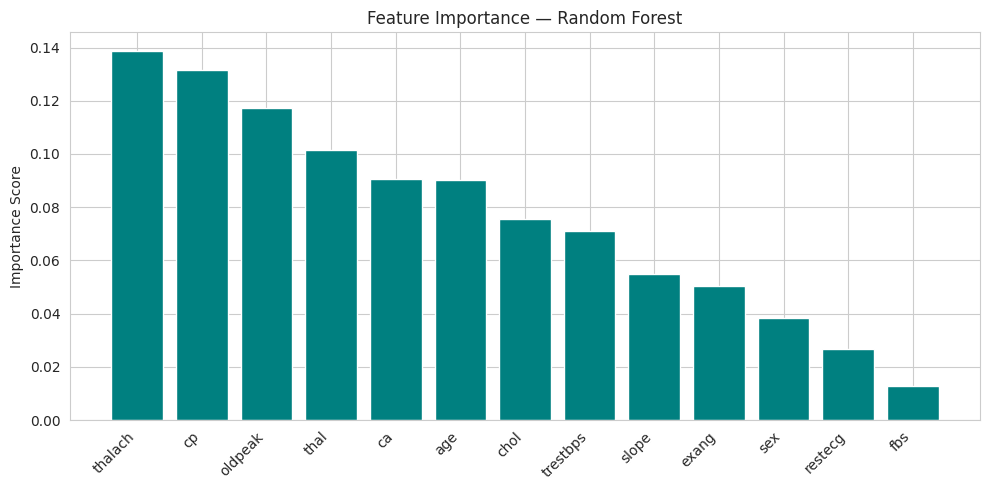

In [19]:
# Get feature importances from the trained Random Forest
feature_names = df.columns[:-1]
importances = rf_model.feature_importances_

# Sort features by importance (descending)
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
plt.bar(range(len(importances)), importances[indices], color="teal", align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=45, ha="right")
plt.title("Feature Importance — Random Forest")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

## Step 8 — Compare Both Models Side by Side

In [20]:
# Build a comparison table with key metrics
results = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest"],
    "Accuracy":  [accuracy_score(y_test, y_pred_dt),  accuracy_score(y_test, y_pred_rf)],
    "Precision": [precision_score(y_test, y_pred_dt), precision_score(y_test, y_pred_rf)],
    "Recall":    [recall_score(y_test, y_pred_dt),    recall_score(y_test, y_pred_rf)],
    "F1 Score":  [f1_score(y_test, y_pred_dt),        f1_score(y_test, y_pred_rf)],
})

# Round to 4 decimal places for readability
results.iloc[:, 1:] = results.iloc[:, 1:].round(4)
print(results.to_string(index=False))

        Model  Accuracy  Precision  Recall  F1 Score
Decision Tree    0.7377     0.7407  0.6897    0.7143
Random Forest    0.8361     0.7879  0.8966    0.8387


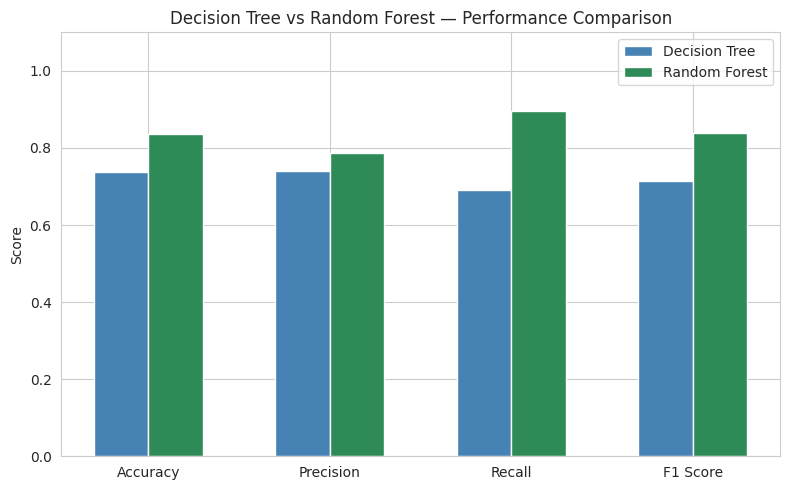

In [21]:
# Visual comparison of Accuracy, Precision, Recall, F1
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
dt_scores = results.iloc[0, 1:].values
rf_scores = results.iloc[1, 1:].values

x = np.arange(len(metrics))
width = 0.3

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, dt_scores, width, label="Decision Tree", color="steelblue")
plt.bar(x + width/2, rf_scores, width, label="Random Forest", color="seagreen")
plt.ylim(0, 1.1)
plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Decision Tree vs Random Forest — Performance Comparison")
plt.legend()
plt.tight_layout()
plt.show()

## Conclusion

| Aspect | Decision Tree | Random Forest |
|---|---|---|
| **How it works** | Single tree that splits data on feature thresholds | Ensemble of many trees, majority vote |
| **Overfitting** | Prone to overfitting | Resistant (averages out individual tree errors) |
| **Interpretability** | Very easy to visualise and explain | Harder to interpret (100 trees) |
| **Accuracy** | Good | Generally better |

**Key takeaway:** Random Forest typically outperforms a single Decision Tree because it reduces variance by combining multiple trees trained on random subsets of data and features.